# Average Franchise Values of the NFL, NBA, MLB, and the NHL

## Data reading

In [54]:
import pandas as pd
import numpy as np 
df = pd.read_csv('Sports.csv') 

## Line Graphs of all Four Organizations

In [55]:
import plotly.express as px
df_long = pd.melt(df, id_vars = ["Year"], value_vars = ["NFL", "NBA", "MLB", "NHL"])
fig = px.line(df_long, x='Year', y='value', color = "variable")
fig.show()

## Graph of the Averages of each Year (Excluding the years with NA values)

In [56]:
df_avg = df.dropna()
df_avg['Mean'] = df_avg.mean(axis=1)
fig = px.bar(df_avg, x='Year', y='Mean')
fig.show()


<ipython-input-56-c14dbfdad7eb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Linear Regression Model of Average NFL Franchise Values (With Predictions)

In [57]:
import statsmodels.formula.api as smf
m = smf.ols("NFL ~ Year", data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NFL   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.08e-09
Time:                        17:38:05   Log-Likelihood:                -149.39
No. Observations:                  21   AIC:                             302.8
Df Residuals:                      19   BIC:                             304.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.481e+05   2.26e+04    -10.958      0.000   -2.95e+05   -2.01e+05
Year         124.1026     11.263     11.018      0.000     100.529     147.677
==============================================================================
Omnibus:                        2.293   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.713
Skew:                          -0.531   Prob(JB):                        0.425
Kurtosis:                       2.088   Cond. No.                     6.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction Aspect

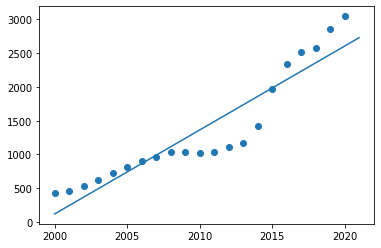

In [58]:
import matplotlib.pyplot as plt
ypred = m.predict(df["Year"])
plt.scatter(df["Year"], df["NFL"])
plt.plot(df["Year"], ypred)